C:\Users\rohit\AppData\Local\Temp\ipykernel_4760\4153180116.py:41: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1 - A2), (1 - Y))
C:\Users\rohit\AppData\Local\Temp\ipykernel_4760\4153180116.py:41: RuntimeWarning: invalid value encountered in log
  logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1 - A2), (1 - Y))
C:\Users\rohit\AppData\Local\Temp\ipykernel_4760\4153180116.py:41: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1 - A2), (1 - Y))


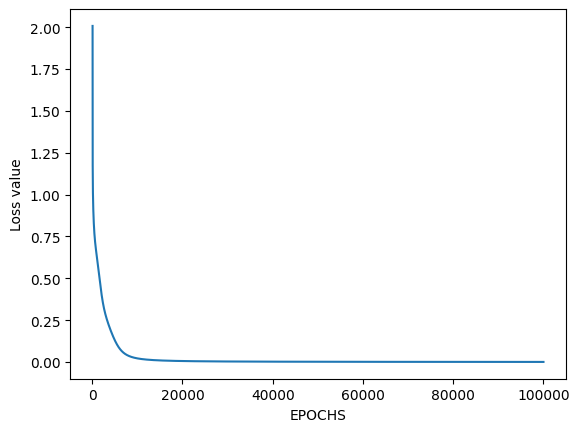

[[9.99296703e-01 1.28041178e-03 7.07937989e-04 9.98686481e-01]]
[[1. 0. 0. 1.]]


In [1]:
# import Python Libraries
import numpy as np
from matplotlib import pyplot as plt
 
# Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def tanh(z):
    return np.tanh(z)
 
# Initialization of the neural network parameters
# Initialized all the weights in the range of between 0 and 1
# Bias values are initialized to 0
def initializeParameters(inputFeatures, neuronsInHiddenLayers, outputFeatures):
    W1 = np.random.randn(neuronsInHiddenLayers, inputFeatures)
    W2 = np.random.randn(outputFeatures, neuronsInHiddenLayers)
    b1 = np.zeros((neuronsInHiddenLayers, 1))
    b2 = np.zeros((outputFeatures, 1))
     
    parameters = {"W1" : W1, "b1": b1,
                  "W2" : W2, "b2": b2}
    return parameters
 
# Forward Propagation
def forwardPropagation(X, Y, parameters):
    m = X.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]
 
    Z1 = np.dot(W1, X) + b1
    # A1 = sigmoid(Z1)
    A1 = tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    # A2 = sigmoid(Z2)
    A2 = tanh(Z2)

    cache = (Z1, A1, W1, b1, Z2, A2, W2, b2)
    logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1 - A2), (1 - Y))
    cost = -np.sum(logprobs) / m
    return cost, cache, A2
 
# Backward Propagation
def backwardPropagation(X, Y, cache):
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2) = cache
     
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis = 1, keepdims = True)
     
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, A1 * (1- A1))
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis = 1, keepdims = True) / m
     
    gradients = {"dZ2": dZ2, "dW2": dW2, "db2": db2,
                 "dZ1": dZ1, "dW1": dW1, "db1": db1}
    return gradients
 
# Updating the weights based on the negative gradients
def updateParameters(parameters, gradients, learningRate):
    parameters["W1"] = parameters["W1"] - learningRate * gradients["dW1"]
    parameters["W2"] = parameters["W2"] - learningRate * gradients["dW2"]
    parameters["b1"] = parameters["b1"] - learningRate * gradients["db1"]
    parameters["b2"] = parameters["b2"] - learningRate * gradients["db2"]
    return parameters
 
# Model to learn the AND truth table
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]]) #  input
Y = np.array([[0, 1, 1, 0]]) # XOR output
 
# Define model parameters
neuronsInHiddenLayers = 2 # number of hidden layer neurons (2)
inputFeatures = X.shape[0] # number of input features (2)
outputFeatures = Y.shape[0] # number of output features (1)
parameters = initializeParameters(inputFeatures, neuronsInHiddenLayers, outputFeatures)
epoch = 100000
learningRate = 0.01
losses = np.zeros((epoch, 1))
 
for i in range(epoch):
    losses[i, 0], cache, A2 = forwardPropagation(X, Y, parameters)
    gradients = backwardPropagation(X, Y, cache)
    parameters = updateParameters(parameters, gradients, learningRate)
 
# Evaluating the performance
plt.figure()
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
plt.show()
 
# Testing
X = np.array([[1, 1, 0, 0], [0, 1, 0, 1]]) # XOR input
cost, _, A2 = forwardPropagation(X, Y, parameters)
prediction = (A2 > 0.5) * 1.0
print(A2)
print(prediction)

In [1]:
import numpy as np 
from keras.models import Sequential
from keras.layers import Dense

#AND Operation
training_data = np.array([[0,0],[0,1],[1,0],[1,1]],"float32")
target_data = np.array([[0],[0],[0],[1]],"float32")

model = Sequential()
model.add(Dense(8,input_dim = 2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy'])

model.fit(training_data,target_data,epochs=1000)
scores = model.evaluate(training_data,target_data)

print("\n%s: %.2f%%" % (model.metrics_names[1],scores[1]*100))
print(model.predict(training_data).round())


Epoch 1/1000
1/1 [==============================] - 0s 398ms/step - loss: 0.2709 - binary_accuracy: 0.7500
Epoch 2/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.2704 - binary_accuracy: 0.7500
Epoch 3/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.2699 - binary_accuracy: 0.7500
Epoch 4/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.2693 - binary_accuracy: 0.7500
Epoch 5/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.2688 - binary_accuracy: 0.7500
Epoch 6/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.2683 - binary_accuracy: 0.7500
Epoch 7/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.2678 - binary_accuracy: 0.7500
Epoch 8/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.2672 - binary_accuracy: 0.7500
Epoch 9/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.2667 - binary_accuracy: 0.7500
Epoch 10/1000
1/1 [==============================] - 

In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
#XOR operations
training_data = np.array([[0,0],[0,1],[1,0],[1,1]], "float32")
target_data = np.array([[0],[1],[1],[0]], "float32")

model = Sequential()
model.add(Dense(12, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error',
                         optimizer='adam',
                       metrics=['binary_accuracy'])
model.fit(training_data, target_data, epochs=1000)
scores = model.evaluate(training_data, target_data)

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print (model.predict(training_data).round())

Epoch 1/1000
1/1 [==============================] - 0s 362ms/step - loss: 0.2333 - binary_accuracy: 0.7500
Epoch 2/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.2331 - binary_accuracy: 0.5000
Epoch 3/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.2328 - binary_accuracy: 0.7500
Epoch 4/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.2325 - binary_accuracy: 0.7500
Epoch 5/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.2322 - binary_accuracy: 0.7500
Epoch 6/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.2319 - binary_accuracy: 0.7500
Epoch 7/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.2316 - binary_accuracy: 0.7500
Epoch 8/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.2313 - binary_accuracy: 0.7500
Epoch 9/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.2310 - binary_accuracy: 0.7500
Epoch 10/1000
1/1 [==============================] - 